In [49]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches


# Parametros de la grilla

In [50]:
Lx, Ly = 14, 10
grid_size = (Lx, Ly)

# Carga de datos


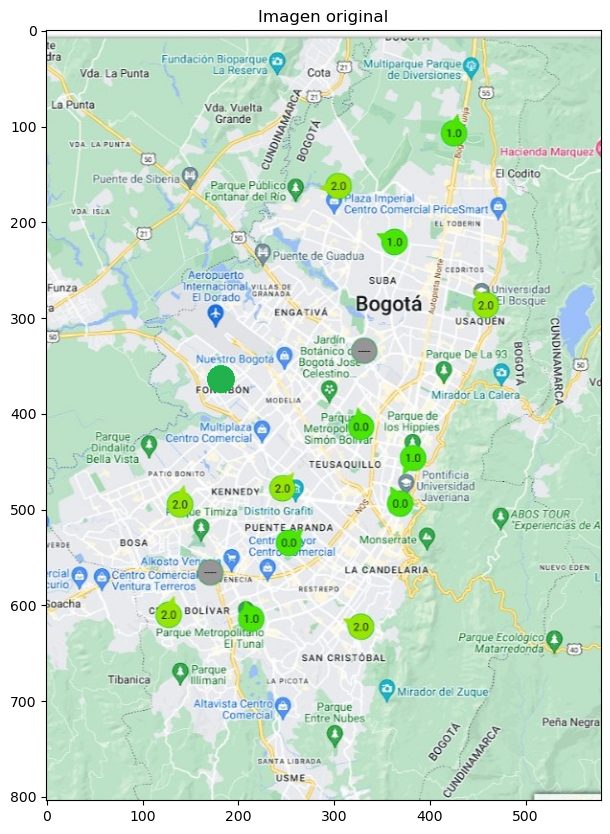

In [51]:
# image_path = '../Map_ref.png'
image_path = '../Mapita.png'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image_rgb, cmap='gray')
plt.title('Imagen original')
plt.show()

# Lectura de la imagen

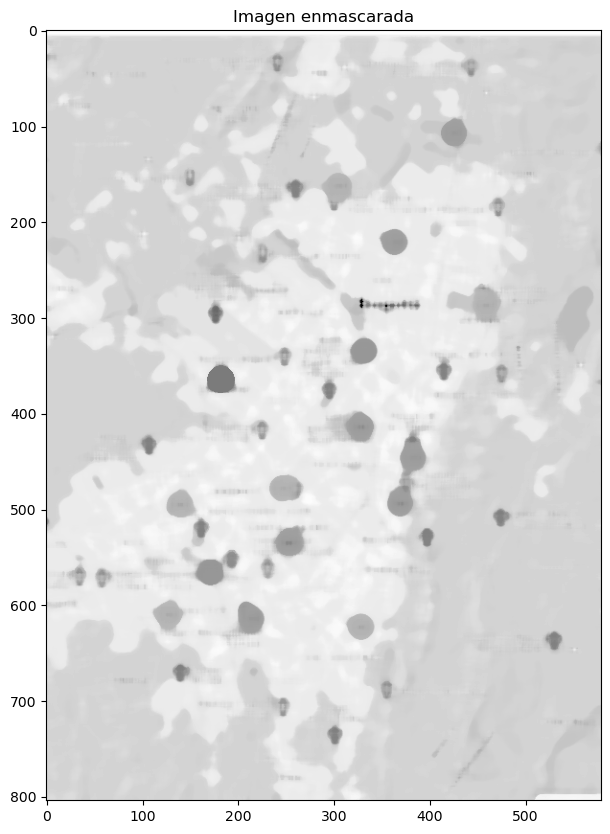

In [119]:

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado para mejorar la detección de círculos
image_blur = cv2.medianBlur(image_gray, 11)

# Definir el rango de valores de gris oscuro
lower_gray = 100
upper_gray = 255

# Crear una máscara para los píxeles oscuros
mask = cv2.inRange(image_blur, lower_gray, upper_gray)

# Aplicar la máscara a la imagen borrosa
masked_image = cv2.bitwise_and(image_blur, image_blur, mask=mask)

# Mostrar la imagen enmascarada
plt.figure(figsize=(10, 10))
plt.imshow(masked_image, cmap='gray')
plt.title('Imagen enmascarada')
plt.show()



# Identificación de coordenadas en la grilla

Se detectaron 11 círculos.


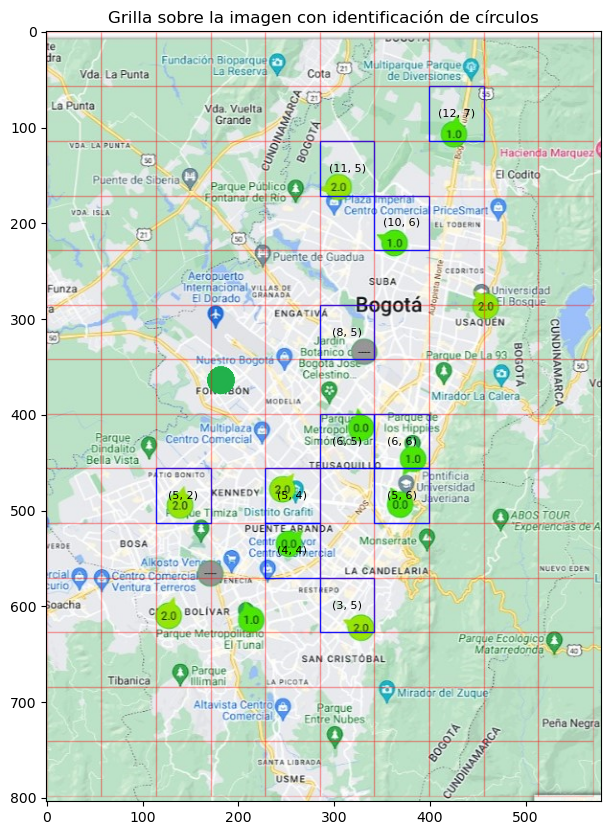

Numero de estaciones contadas: 11.0


In [120]:
# Detectar círculos usando la transformada de Hough
circles = cv2.HoughCircles(masked_image, cv2.HOUGH_GRADIENT, dp=1.3, minDist=20,
                           param1=50, param2=30, minRadius=12, maxRadius=21)


# Verificar si se han detectado círculos
if circles is not None:
    print(f'Se detectaron {circles.shape[1]} círculos.')
    # Redondear las coordenadas y el radio de los círculos
    circles = np.round(circles[0, :]).astype("int")
    # Crear una matriz para almacenar la grilla de posiciones de las estaciones
    height, width, _ = image.shape
    #Se definen las dimensiones de las celdas
    cell_height = height // grid_size[0]
    cell_width = width // grid_size[1]
    #Se crea la matriz de posiciones de las estaciones
    stations_positions = np.zeros(grid_size)

    # Crear una figura para visualizar la imagen y la grilla
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    N_estaciones = 0

    # Procesar cada círculo detectado
    for (x, y, r) in circles:
        #Celda en la que se encuentra el círculo
        cell_x = x // cell_width
        cell_y = ((height - y)  // cell_height) 
        # print(f'Estación en la celda ({cell_y}, {cell_x})')
        
        # Marcar la celda en la grilla
        stations_positions[cell_y, cell_x] = 1

    # Colorear la grilla sobre la imagen
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if stations_positions[i, j] == 1:
                N_estaciones +=  stations_positions[i, j]
                rect = patches.Rectangle((j * cell_width, (Lx - 1 - i) * cell_height), cell_width, cell_height, linewidth=1, edgecolor='b', facecolor='none', alpha=0.9)
                ax.add_patch(rect)
                # Anotar la posición en la celda
                plt.text(j * cell_width + cell_width / 2, (Lx - 1 - i) * cell_height + cell_height / 2, f'({i}, {j})', color='black', fontsize=8, ha='center', va='center', alpha=1)
                
            else:
                rect = patches.Rectangle((j * cell_width, (Lx - 1 - i) * cell_height), cell_width, cell_height, linewidth=1, edgecolor='r', facecolor='none', alpha=0.2)
                ax.add_patch(rect)

    # Mostrar la imagen con las posiciones de los círculos y la grilla coloreada
    plt.title('Grilla sobre la imagen con identificación de círculos')
    plt.show()
    print(f'Numero de estaciones contadas: {N_estaciones}')

else:
    print("No se detectaron círculos.")

In [64]:
cell_height, cell_width

(57, 57)

# Relacionación con las estaciones reales

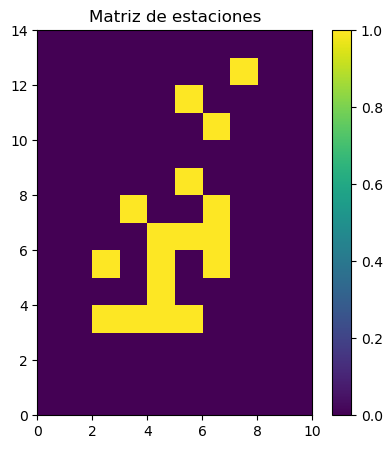

In [55]:
#Matiz de estaciones
plt.figure(figsize=(5,5))
# plt.imshow(stations_positions)
plt.imshow(stations_positions, extent=[0, Ly, 0, Lx], origin='lower')
plt.colorbar()
plt.title('Matriz de estaciones')
plt.show()

In [56]:
#Lectura de estaciones
path_data = '../estaciones.txt'
data_estaciones = pd.read_csv(path_data)
len(data_estaciones)

19

In [57]:

# Filtrar el dataset por la columna "VelViento" igual a True
data_VelViento = data_estaciones[data_estaciones['VelViento'] == True]

len(data_VelViento)

16

In [58]:
# Verificar si lo siguiente es correcto
# Recorrer `stations_positions` y asignar coordenadas a los valores distintos de cero
# Estas se recorren en i de izquierda a derecha y en j de abajo hacia arriba ya
# en el dataset se encuentran las estaciones en orden de arriba hacia abajo y 
# de izquierda a derecha
for i in reversed(range(Lx)):
    for j in reversed(range(Ly)):
        if data_VelViento[i, j] != 0:
            # print(f'Estación en la celda ({i}, {j})')
            coords_X.append(i)
            coords_Y.append(j)

# Asignar las coordenadas al DataFrame
data_estaciones['x_cell'] = coords_X
data_estaciones['y_cell'] = coords_Y

data_estaciones

KeyError: (13, 9)

In [ ]:
#Observaciones codigo:
# Mostrar incendios
# Poner distancias en la imagen
# Tener cuidad con el tamaño de las celdas y el tamaño de los circulos

In [ ]:
def meters_per_pixel(pixel, distance):
    return distance/pixel

def time_per_pixel(distance):
    vel_sound = 343
    c = 1/np.sqrt(3)
    return (distance*c)/vel_sound

In [ ]:
scale = meters_per_pixel(52,2000)
distance_cell = 57*scale
distance_cell

2192.3076923076924

In [ ]:
time = time_per_pixel(distance_cell)
time

3.6901732836744423

Factor de conversión: 38.46153846153846 metros por píxel


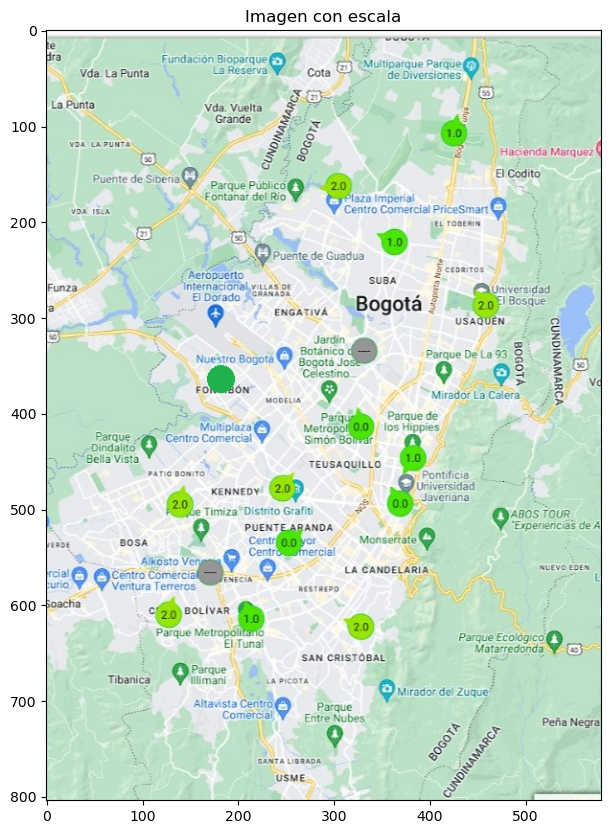

Distancia entre los puntos: 6933.7524528153635 metros


In [ ]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ejemplo: Longitud de la escala en píxeles y distancia real que representa
length_in_pixels =  52 # Este valor debe ser medido manualmente en la imagen
distance_in_meters = 2000  # Distancia real que representa la escala (2 km = 2000 metros)


# Calcular el factor de conversión
meters_per_pixel = distance_in_meters / length_in_pixels
print(f"Factor de conversión: {meters_per_pixel} metros por píxel")

# Mostrar la imagen
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title('Imagen con escala')
plt.show()

# Calcular distancia entre dos puntos en la imagen
# Ejemplo: coordenadas de dos estaciones en píxeles (debes obtener estas coordenadas)
point1 = (400, 300)  # Ejemplo de coordenada 1
point2 = (500, 450)  # Ejemplo de coordenada 2

# Calcular la distancia en píxeles
distance_in_pixels = np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

# Convertir la distancia a metros
distance_in_meters = distance_in_pixels * meters_per_pixel
print(f"Distancia entre los puntos: {distance_in_meters} metros")

In [ ]:
def meters_per_pixel(lat, zoom):
    return (np.cos(lat * np.pi / 180) * 2 * np.pi * 6378137) / (256 * 2**zoom)

In [ ]:
# Ejemplo: latitud y nivel de zoom
lat = 0  # Bogotá, Colombia
zoom = 13  # Nivel de zoom

# Calcular la escala
scale = meters_per_pixel(lat, zoom)

print(f"Escala: {scale} metros por píxel")

Escala: 19.109257071294063 metros por píxel


In [ ]:
# Ejemplo: latitud y nivel de zoom
lat = 4.6097100  # Bogotá, Colombia
zoom = 13  # Nivel de zoom

# Calcular la escala
scale = meters_per_pixel(lat, zoom)
print(f"Escala: {scale} metros por píxel")

Escala: 19.04744383600458 metros por píxel


In [ ]:
# Ejemplo: latitud y nivel de zoom
lat = 0  # Bogotá, Colombia
zoom = 13  # Nivel de zoom

# Calcular la escala
scale = meters_per_pixel(lat, zoom)
print(f"Escala: {scale} metros por píxel")

Escala: 19.109257071294063 metros por píxel
